<font size="5"> The Prediction of heart disease based on symptoms and patient characteristics </font>

<font size= "3"> DSCI 100 section 010 group 22:  Emily Chen, Mehakpreet Dhaliwal, Haoxi Jiang, Manika Mohinani.  </font>

<font size= "4"> Introduction </font>

Heart disease, a term used to refer to several types of heart conditions, is one of the leading causes of death worldwide. Factors including lifestyle, genetic predisposition, and age, can influence an individual’s likelihood of developing heart disease. By understanding the interplay between these contributors, global healthcare agencies can work towards the improvement of early detection and prevention strategies. According to health authorities and research, angina, commonly known as chest pain, is a significant factor in the diagnosis of heart disease, along with age, cholesterol levels, and blood pressure (“Heart Disease”, 2020). We aim to address the question “Can we create a model to predict whether an individual in Cleveland is likely to have heart disease based on specific symptoms and biology of patients?” We will utilise the processed Cleveland data from the dataset ‘Heart Disease’ provided by ‘UC Irvine Machine Learning Repository’, focusing on variables that are reportedly significant in diagnosis of heart disease. 

<font size= "3"> Research question: Can we create a model to predict whether an individual is likely to have heart disease based on the patient symptoms and their various characteristics? </font>

<font size= "4"> Method and result </font>

We plan to use the K-nearest neighbor classification algorithm to predict and determine the type of heart disease using information about the patients and evaluate the effectiveness of our model. The classification algorithm is used because we are predicting the targets that represent distinct heart disease, which are categorical variables. The considered predictors are cholesterol levels in blood, and resting blood pressure.

We will create visualizations to showcase the relationship between chest pain and each variable for each category of heart disease separately and adapt each set of variables as predictors into a classification model to predict the target, which represents the category of heart disease. We will create and test our model using the data by putting it together in a workflow. Our k value will be chosen after conducting a cross-validation for a 5-fold test and then plot the RMSE to decide on the optimal k value with the least prediction error.

Lastly, we will evaluate which model offers the most reliable results using metrics and calculating precision, accuracy, and recall. However, there are limitations to our method. We used a singular dataset with limited data; there were only 14 variables measured. Hence, our model may only represent and make predictions based on the limited data in the dataset, which may compromise the ability of the model in applications with larger populations with more comprehensive data presented.

<font size= "3"> Data analysis </font>

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
library(ggplot2)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [2]:
url <- "https://archive.ics.uci.edu/static/public/45/heart+disease.zip"
destination_dir <- "heart_disease_dataset"
download.file(url, destfile = "heart_disease.zip", mode = "wb")
unzip("heart_disease.zip", exdir = destination_dir)
list.files(destination_dir)

[1] "ask-detrano"                "bak"                       
 [3] "cleve.mod"                  "cleveland.data"            
 [5] "costs"                      "heart-disease.names"       
 [7] "hungarian.data"             "Index"                     
 [9] "long-beach-va.data"         "new.data"                  
[11] "processed.cleveland.data"   "processed.hungarian.data"  
[13] "processed.switzerland.data" "processed.va.data"         
[15] "reprocessed.hungarian.data" "switzerland.data"          
[17] "WARNING"

In [3]:
heart_data_rough <- read.csv(file.path(destination_dir, "processed.cleveland.data"), header = FALSE, na.strings = c("", "?"))
column_names <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target")
heart_data <- read.csv(file.path(destination_dir, "processed.cleveland.data"), header = FALSE, col.names = column_names, na.strings = c("", "?", "NA"))
heart_data_clean <- heart_data |>
mutate(target = as_factor(target))
head(heart_data_clean)
tail(heart_data_clean)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
6,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
298,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
299,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
300,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
301,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
302,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
303,38,1,3,138,175,0,0,173,0,0.0,1,NA,3,0


We are creating a training data set with 75% of the data

In [4]:
set.seed(123)
heart_disease_split <- initial_split(heart_data_clean, prop = 0.75, strata = target)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

<font size= "4"> Predicting heart disease type by cholesterol levels, and blood pressure </font>

In [5]:
table_data <- heart_disease_train |>
select("chol", "trestbps", "target")

# number of obs
num_obs <- nrow(table_data)
heart_disease_obs <- table_data |> 
group_by(target) |>
summarise(count = n(),
         percentage = n()/num_obs*100)


# Resting bp and cholesterol relationship
heart_cp_chol <- table_data |>
group_by(target) |>
summarise(mean_trestbps = mean(trestbps), 
          mean_chol = mean(chol))
heart_cp_chol 

heart_cp_chol_chart <- table_data |>
group_by(target) |>
summarise(across(c(chol, trestbps)))

target,mean_trestbps,mean_chol
<fct>,<dbl>,<dbl>
0,128.9836,244.6967
1,133.6341,245.2683
2,136.6923,256.0000
3,134.3846,247.5769
4,142.7000,250.6000


Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'target'. You can override using the
`.groups` argument.


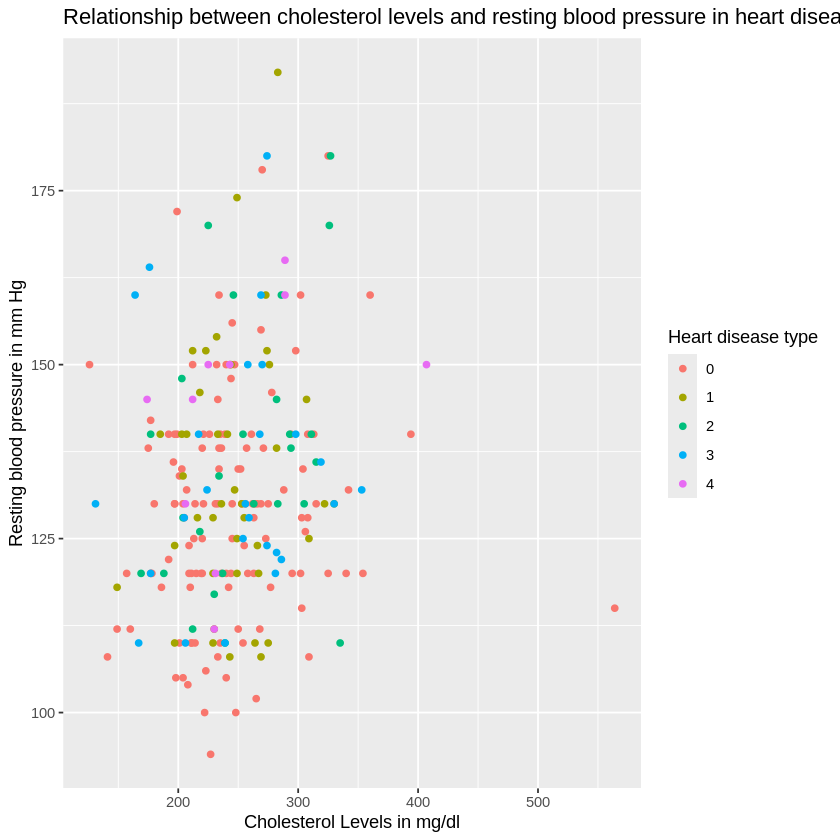

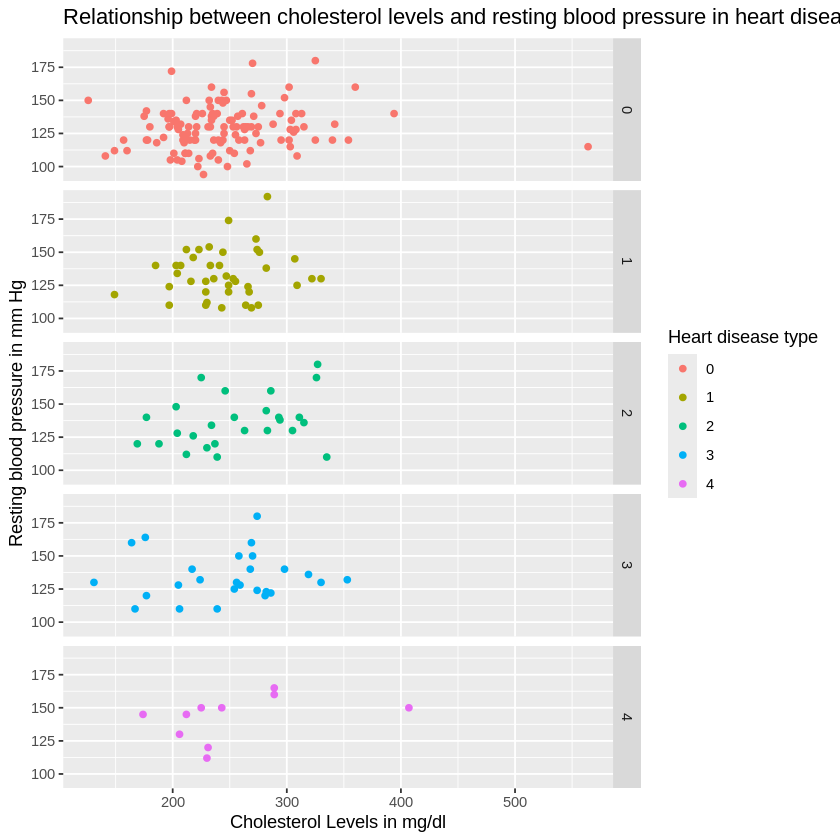

In [6]:
# Resting bp and cholesterol relationship plot
heart_cp_bp_plot<- ggplot(heart_cp_chol_chart, aes(x = chol, y= trestbps, color= target)) +
geom_point()+labs(x = "Cholesterol Levels in mg/dl", 
                  y = "Resting blood pressure in mm Hg", 
                  title = "Relationship between cholesterol levels and resting blood pressure in heart disease", 
                  color = "Heart disease type")
heart_cp_bp_plot

heart_cp_bp_many<- ggplot(heart_cp_chol_chart, aes(x = chol, y= trestbps, color= target)) +
geom_point()+labs(x = "Cholesterol Levels in mg/dl", 
                  y = "Resting blood pressure in mm Hg", 
                  title = "Relationship between cholesterol levels and resting blood pressure in heart disease", 
                  color = "Heart disease type")+
facet_grid(rows=vars(target))
heart_cp_bp_many

In [7]:
# K-nn spec and fitting- chol
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5)|>
set_engine("kknn")|>
set_mode("classification")


heart_recipe <- recipe(target~ trestbps+chol, data = heart_disease_train)|>
step_scale(all_predictors())|>
step_center(all_predictors())

heart_fit <- workflow()|>
add_recipe(heart_recipe)|>
add_model(knn_spec)|>
fit(data= heart_disease_train)


# Predict class labels for our test set- chol
heart_test_predictions <- predict(heart_fit, heart_disease_test) |>
       bind_cols(heart_disease_test)

prediction_accuracy <- heart_test_predictions |>
         metrics(truth = target, estimate = .pred_class) 
prediction_accuracy

heart_mat <- heart_test_predictions |> 
       conf_mat(truth = target, estimate = .pred_class)
heart_mat

heart_test_predictions |>
  precision(truth = target, estimate = .pred_class, event_level = "first")

# compute accuracy
acc_heart <- heart_test_predictions |>
  metrics(truth = target, estimate = .pred_class) |>
  filter(.metric == "accuracy") |>
  select(.estimate) |>
  pull()
acc_heart

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.42307692
kap,multiclass,-0.05278944


          Truth
Prediction  0  1  2  3  4
         0 32  8  9  9  3
         1  8  1  0  0  0
         2  0  2  0  0  0
         3  1  2  1  0  0
         4  1  1  0  0  0

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,macro,0.1271403


[1] 0.4230769

→ A | warning: No observations were detected in `truth` for level(s): '4'
               Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

There were issues with some computations   A: x1



→ A | warning: No observations were detected in `truth` for level(s): '4'
               Computation will proceed by ignoring those levels.



neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,multiclass,0.3107291,5,0.02179647,Preprocessor1_Model1
2,roc_auc,hand_till,0.4934956,5,0.01710727,Preprocessor1_Model1
5,accuracy,multiclass,0.4146218,5,0.02211740,Preprocessor1_Model2
5,roc_auc,hand_till,0.4892120,5,0.01989379,Preprocessor1_Model2
7,accuracy,multiclass,0.4498125,5,0.02265040,Preprocessor1_Model3
7,roc_auc,hand_till,0.4689793,5,0.01672883,Preprocessor1_Model3
10,accuracy,multiclass,0.4673049,5,0.02360772,Preprocessor1_Model4
10,roc_auc,hand_till,0.5066098,5,0.02409398,Preprocessor1_Model4
13,accuracy,multiclass,0.5206992,5,0.01368023,Preprocessor1_Model5


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”


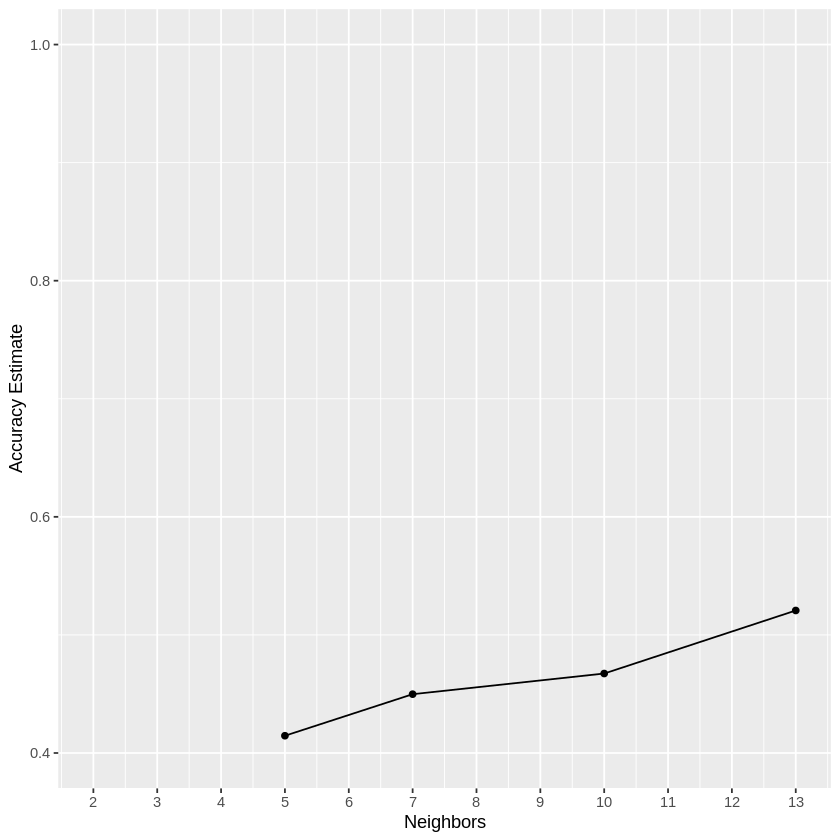

In [8]:
#5-fold cross-validation: trestbps and chol
heart_vfold <- vfold_cv(heart_disease_train, v = 5, strata = target)

vfold_metrics <- workflow() |>
                  add_recipe(heart_recipe) |>
                  add_model(knn_spec) |>
                  fit_resamples(resamples = heart_vfold) |>
                  collect_metrics()

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune())|>
set_engine("kknn")|>
set_mode("classification")


knn_results <- workflow() |>
       add_recipe(heart_recipe) |>
       add_model(knn_tune) |>
       tune_grid(resamples = heart_vfold, grid = 5) |>
       collect_metrics()
knn_results
# do we use 10 K values or 5?

accuracies <- knn_results |> 
       filter(.metric == "accuracy")

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
       scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis
accuracy_versus_k

<font size= "4"> Predicting heart disease type by cholesterol levels, and age  </font>

In [10]:
table_data_2 <- heart_disease_train |>
select("chol", "age", "target")

# number of obs
num_obs_2 <- nrow(table_data_2)
heart_disease_obs <- table_data_2 |> 
group_by(target) |>
summarise(count = n(),
         percentage = n()/num_obs*100)

# Age and cholesterol relationship
heart_chol_age <- table_data_2 |>
group_by(target) |>
summarise(mean_age = mean(age), 
          mean_chol = mean(chol))
heart_chol_age

heart_chol_age_chart <- table_data_2 |>
group_by(target) |>
summarise(across(c(chol, age)))

target,mean_age,mean_chol
<fct>,<dbl>,<dbl>
0,52.60656,244.6967
1,56.12195,245.2683
2,58.15385,256.0000
3,56.61538,247.5769
4,58.00000,250.6000


Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'target'. You can override using the
`.groups` argument.


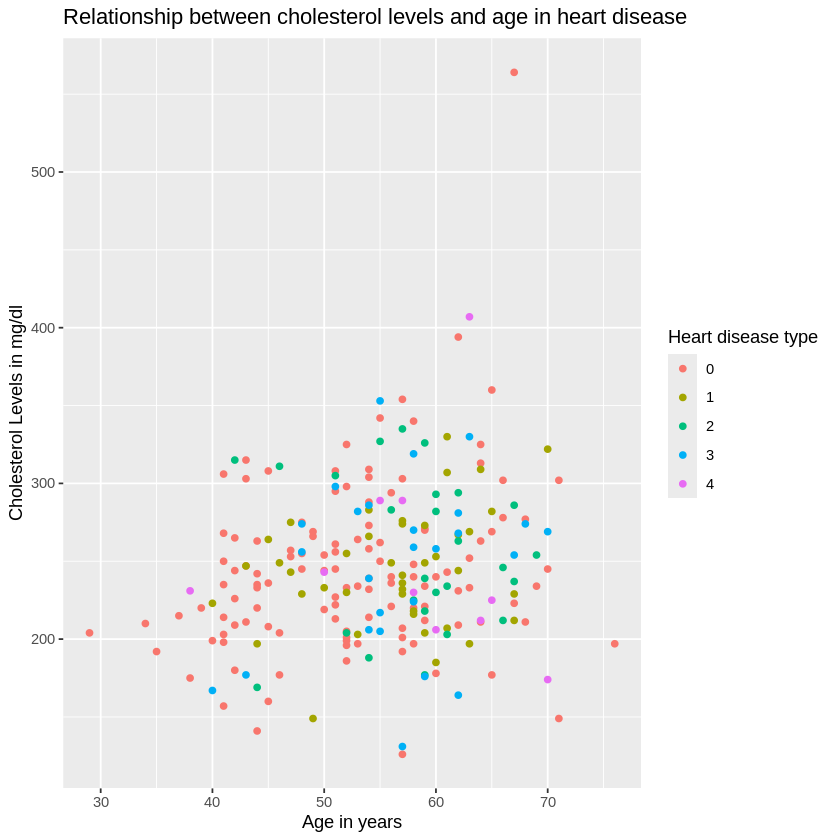

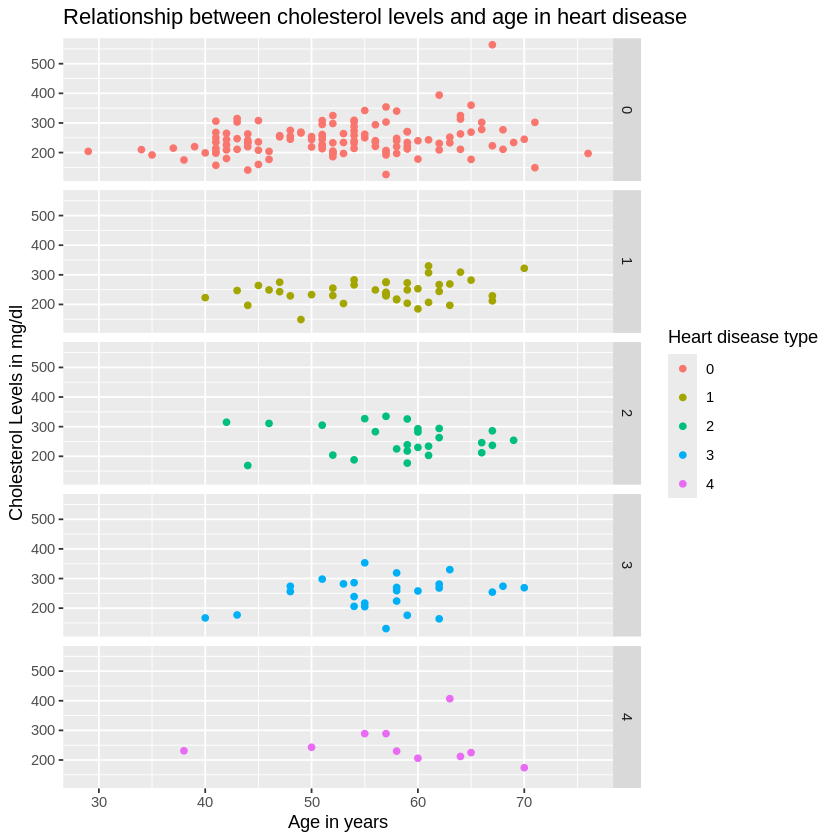

In [11]:
# Age and cholesterol relationship plot
heart_age_plot<- ggplot(heart_chol_age_chart, aes(x = age, y= chol, color= target)) +
geom_point()+labs(x = "Age in years", 
                  y = "Cholesterol Levels in mg/dl", 
                  title = "Relationship between cholesterol levels and age in heart disease", 
                  color = "Heart disease type")
heart_age_plot

heart_age_many<- ggplot(heart_chol_age_chart, aes(x = age, y= chol, color= target)) +
geom_point()+labs(x = "Age in years", 
                  y = "Cholesterol Levels in mg/dl", 
                  title = "Relationship between cholesterol levels and age in heart disease", 
                  color = "Heart disease type")+
facet_grid(rows=vars(target))
heart_age_many

In [13]:
# K-nn spec and fitting- chol
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5)|>
set_engine("kknn")|>
set_mode("classification")


heart_recipe_2 <- recipe(target~ age+chol, data = heart_disease_train)|>
step_scale(all_predictors())|>
step_center(all_predictors())

heart_fit_2 <- workflow()|>
add_recipe(heart_recipe_2)|>
add_model(knn_spec)|>
fit(data= heart_disease_train)


# Predict class labels for our test set- chol
heart_test_predictions_2 <- predict(heart_fit_2, heart_disease_test) |>
       bind_cols(heart_disease_test)

prediction_accuracy_2 <- heart_test_predictions_2 |>
         metrics(truth = target, estimate = .pred_class) 
prediction_accuracy_2

heart_mat_2 <- heart_test_predictions_2 |> 
       conf_mat(truth = target, estimate = .pred_class)
heart_mat_2

heart_test_predictions_2 |>
  precision(truth = target, estimate = .pred_class, event_level = "first")

# compute accuracy
acc_heart_2 <- heart_test_predictions_2 |>
  metrics(truth = target, estimate = .pred_class) |>
  filter(.metric == "accuracy") |>
  select(.estimate) |>
  pull()
acc_heart_2

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.46153846
kap,multiclass,0.05345276


          Truth
Prediction  0  1  2  3  4
         0 34  8  8  6  1
         1  3  2  2  1  0
         2  2  2  0  1  1
         3  3  2  0  0  1
         4  0  0  0  1  0

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,macro,0.1692982


[1] 0.4615385

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
3,accuracy,multiclass,0.4272130,5,0.029311317,Preprocessor1_Model1
3,roc_auc,hand_till,0.5156138,5,0.017262727,Preprocessor1_Model1
4,accuracy,multiclass,0.4533919,5,0.015572225,Preprocessor1_Model2
4,roc_auc,hand_till,0.5261118,5,0.010488107,Preprocessor1_Model2
7,accuracy,multiclass,0.4624046,5,0.021640979,Preprocessor1_Model3
7,roc_auc,hand_till,0.5147858,5,0.005451198,Preprocessor1_Model3
9,accuracy,multiclass,0.4665548,5,0.022156809,Preprocessor1_Model4
9,roc_auc,hand_till,0.4993973,5,0.018421656,Preprocessor1_Model4
14,accuracy,multiclass,0.4974906,5,0.024784460,Preprocessor1_Model5


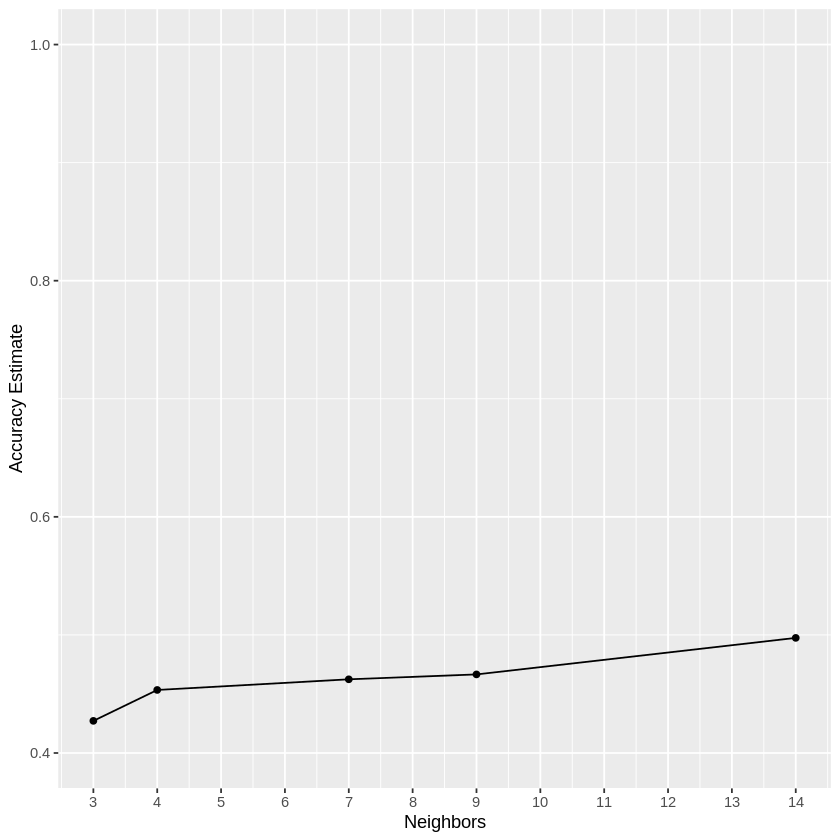

In [15]:
# 5-fold cross-validation: age and chol
heart_vfold <- vfold_cv(heart_disease_train, v = 5, strata = target)

vfold_metrics_2 <- workflow() |>
                  add_recipe(heart_recipe_2) |>
                  add_model(knn_spec) |>
                  fit_resamples(resamples = heart_vfold) |>
                  collect_metrics()


knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune())|>
set_engine("kknn")|>
set_mode("classification")


knn_results_2 <- workflow() |>
       add_recipe(heart_recipe_2) |>
       add_model(knn_tune) |>
       tune_grid(resamples = heart_vfold, grid = 5) |>
       collect_metrics()
knn_results_2
# do we use 10 K values or 5?

accuracies_2 <- knn_results_2 |> 
       filter(.metric == "accuracy")

accuracy_versus_k_2 <- ggplot(accuracies_2, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
       scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis
accuracy_versus_k_2

<font size= "4"> Max accuracy and knn members  </font>
cholesterol levels and resting heart rate
Accuracy: 52%
k = 13

cholesterol levels and age
Accuracy: 49%
k = 14

<font size= "4"> Discussion </font>

<font size= "4"> Reference </font>

Heart Disease. (2022). Retrieved March 8, 2024, from https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118

5 Heart Numbers You Need to Know. (n.d.). Retrieved March 8, 2024, from https://www.hopkinsmedicine.org/health/wellness-and-prevention/5-heart-numbers-you-need-to-know

Bösner, S., Boesner, S., Becker, A., Abu Hani, M., Keller, H., Soennichsen, A. C., Haasenritter, J., Karatolios, K., Schaefer, J. R., Baum, E., & Donner-Banzhoff, N. (2010). Accuracy of symptoms and signs for coronary heart disease assessed in primary care. British Journal of General Practice, 60(575), e246-e257. https://doi.org/10.3399/bjgp10X502137